# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [4]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

**Question**: Which insurance kinds are linked to clients who, based on their lifetime value, substantially increase the profitability of the business?


**Answer**: Master's degree holders are a major source of revenue for the organization, especially for those with Corporate and Personal insurance. In the same way, consumers in the Corporate policy category with a high school education also exhibit strong profitability. Optimizing marketing tactics and rewards to appeal to these policy types particularly to recent high school and master's degree holders may increase overall profitability. Additional examination of the traits and actions of these client categories could provide more profound understanding for strategic choice-making.







## Supporting Analysis

In [4]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'policy'. You can override using the
`.groups` argument.


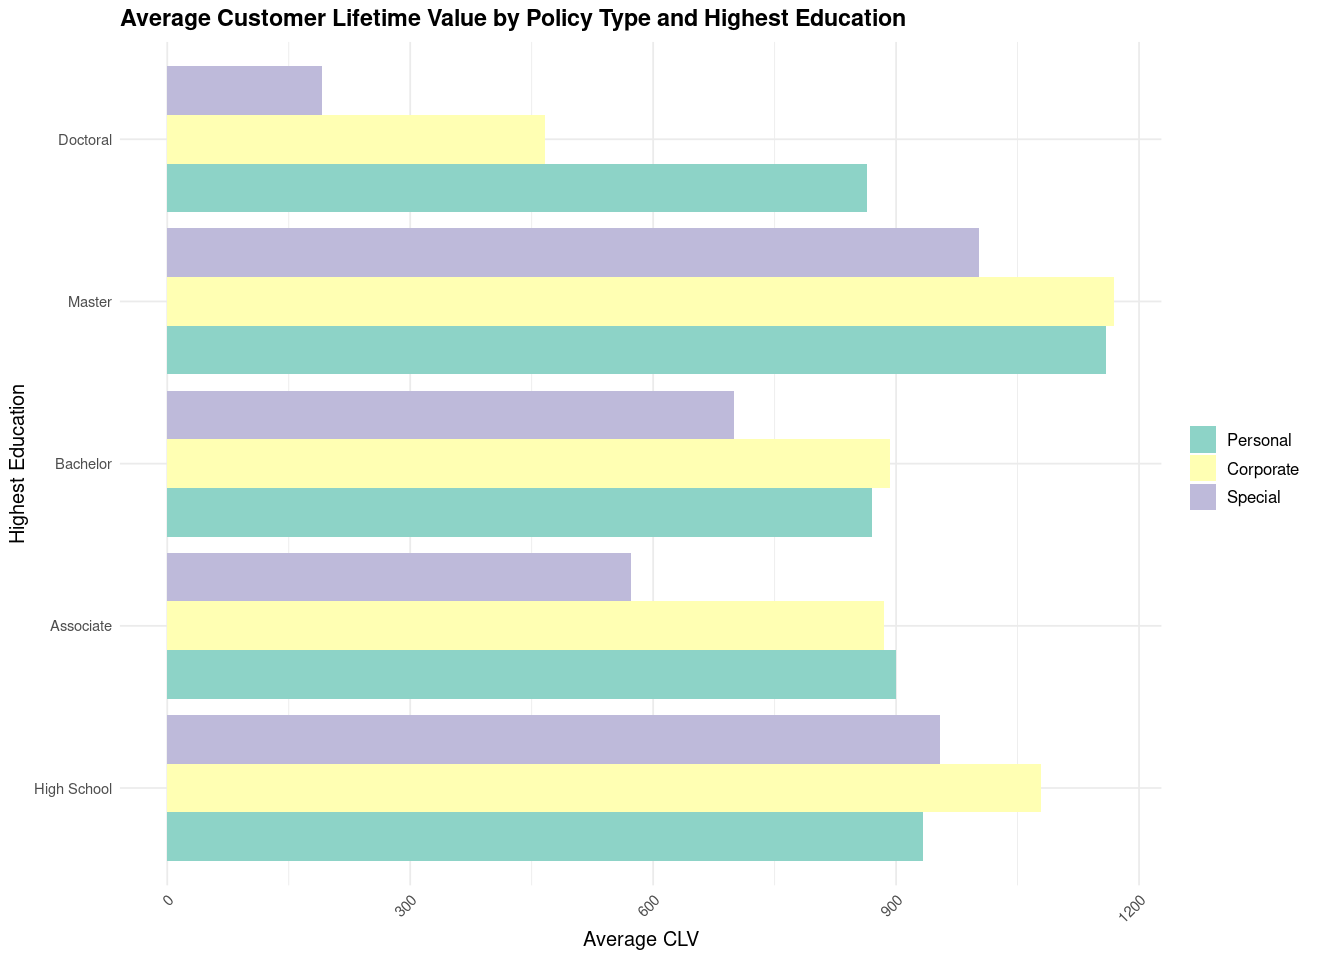

In [5]:
# average customer lifetime value (CLV) by policy type and Highest Education
profitable_customers <- claims_df %>%
  group_by(policy, highest_education) %>%
  summarise(avg_CLV = mean(customer_lifetime_value))

# bar chart for average CLV for different policy types
ggplot(profitable_customers, aes(y = interaction(highest_education), x = avg_CLV, fill = policy)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Customer Lifetime Value by Policy Type and Highest Education",
       y = "Highest Education", x = "Average CLV", fill = "Policy Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 12),
        legend.title = element_blank(),
        legend.text = element_text(size = 10)) +
  scale_fill_brewer(palette = "Set3") 


## Question 2


**Question**: Do certain insurance provide higher profits because there are fewer claims?



**Answer**: The 'Special' and 'Corporate' policy types, in particular, show a smaller number of claims, which might mean higher profits for the insurance firm. According to the data, these policy types have lower claim frequencies, which suggests lower payment amounts and, thus, higher profitability. Leveraging plans with reduced rates of claims allows the business to maximize profits and financial performance.


## Supporting Analysis


policy,total_claims
<fct>,<dbl>
Personal,11131
Corporate,3175
Special,640


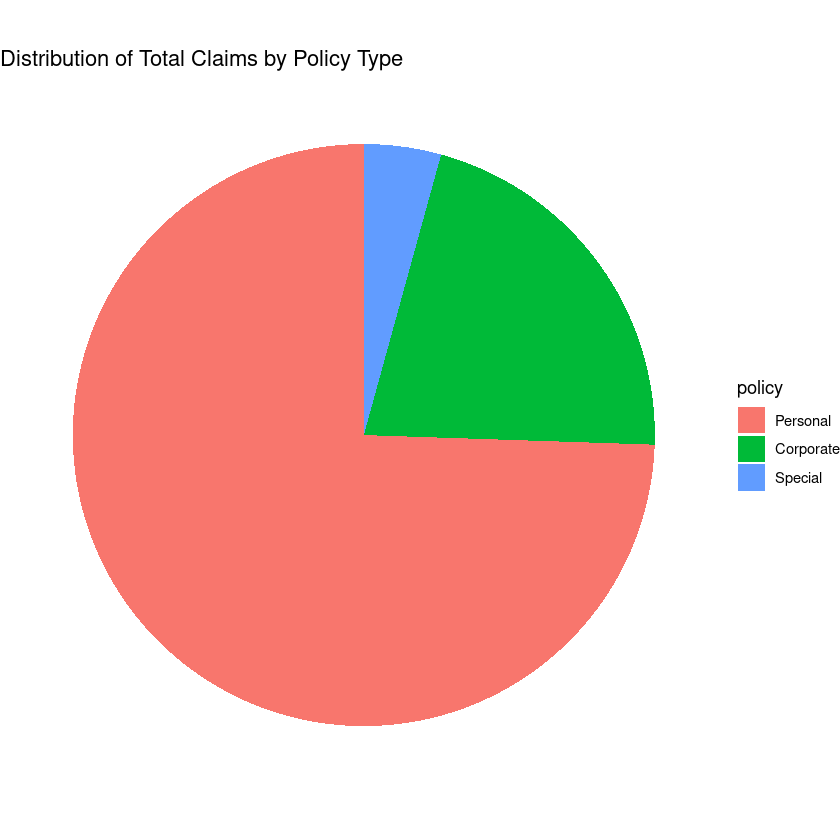

In [21]:
library(ggplot2)
library(dplyr)

# Grouping data by policy type and calculating total claims
claims_by_policy <- claims_df %>%
  group_by(policy) %>%
  summarise(total_claims = sum(total_claims))

# Pie chart
ggplot(claims_by_policy, aes(x = "", y = total_claims, fill = policy)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Distribution of Total Claims by Policy Type") +
  theme_void()

# Display
claims_by_policy



## Question 3


**Question**: Do certain "problem customers" have a high volume of claims filed?


**Answer**: Indeed, out of the top claimants—0.16% of all customers—ten people stand out as "problem customers" with an average of four claims per. These clients have noticeably greater claim frequencies than normal clients, which may be a sign of problems with their insurance experiences. To reduce losses for the insurance business and raise client satisfaction levels overall, it is imperative to find and fix the root causes of their repeated claims. Targeted tactics like risk assessment and individualized support may be used to handle these demanding clients in an efficient manner, which will enhance long-term client relationships and profitability.








## Supporting Analysis


In [10]:
# total number of customers
total_customers <- nrow(claims_df)

# "problem customers" with the highest number of claims
top_problem_customers <- claims_df %>%
  arrange(desc(total_claims)) %>%
  slice(1:10)

# percentage of "problem customers" among total customers
percentage_problem_customers <- (nrow(top_problem_customers) / total_customers) * 100

# average number of claims per "problem customer"
average_claims_per_customer <- mean(top_problem_customers$total_claims)

top_problem_customers
# results
cat("Percentage of customers among the top claimants:", round(percentage_problem_customers, 2), "%\n")
cat("Number of 'problem customers' among total customers:", nrow(top_problem_customers), "\n")
cat("Average number of claims per 'problem customer':", round(average_claims_per_customer, 2), "\n")

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG62140,California,Associate,Employed,Female,33716,Suburban,Married,Agent,Basic,Personal,Four-Door Car,Small,68,43,18,1337,4,3296,-372
AH53588,California,Associate,Retired,Male,26802,Suburban,Married,Agent,Basic,Personal,Two-Door Car,Midsize,66,26,7,1805,4,5606,-3890
AI58313,Nevada,Associate,Employed,Female,75425,Suburban,Divorced,Call Center,Basic,Personal,Sports Car,Midsize,116,42,25,1270,4,2851,2021
AJ32539,Oregon,Bachelor,Employed,Male,25860,Suburban,Married,Web,Basic,Personal,Four-Door Car,Midsize,72,28,12,2135,4,4313,-2297
AL46984,California,High School,Employed,Male,43259,Suburban,Married,Branch,Basic,Personal,Four-Door Car,Midsize,73,26,12,2144,4,4802,-2904
AM36670,California,Associate,Employed,Female,54827,Rural,Single,Branch,Basic,Personal,Four-Door Car,Large,64,31,17,1255,4,3571,-1587
AN57220,Oregon,Bachelor,Employed,Female,96917,Rural,Married,Web,Basic,Special,Four-Door Car,Midsize,61,39,24,1504,4,4564,-2185
AO77635,California,Associate,Employed,Female,28987,Rural,Married,Branch,Basic,Personal,SUV,Midsize,102,39,8,1148,4,3881,97
AQ91207,California,High School,Employed,Male,38667,Urban,Married,Branch,Basic,Personal,Four-Door Car,Midsize,63,22,9,1634,4,4394,-3008


Percentage of customers among the top claimants: 0.16 %
Number of 'problem customers' among total customers: 10 
Average number of claims per 'problem customer': 4 


## Question 4


**Question**: Does a customer's income level impact their lifetime value?


**Answer**: Plot and analysis suggest that income level has no appreciable impact on customer lifetime value (CLV). The scatter plot showing the correlation between average CLV and income level is devoid of any discernible pattern or trend. This implies that the CLV in this dataset may not be greatly influenced by income level alone. There is no relationship between them, according to additional statistical study using correlation coefficients.







## Supporting Analysis


`geom_smooth()` using formula = 'y ~ x'


Correlation between income level and CLV: -0.06 


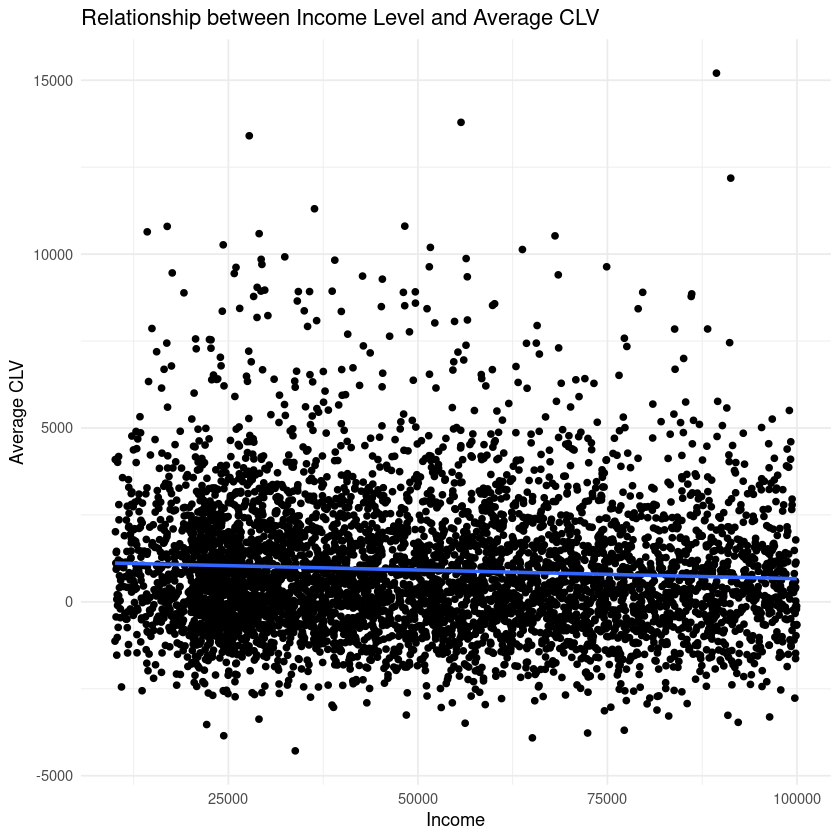

In [12]:

# average CLV for each income level
avg_CLV_by_income <- claims_df %>%
  group_by(income) %>%
  summarise(avg_CLV = mean(customer_lifetime_value, na.rm = TRUE))

# Scatter plot 
ggplot(avg_CLV_by_income, aes(x = income, y = avg_CLV)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Relationship between Income Level and Average CLV",
       x = "Income", y = "Average CLV") +
  theme_minimal()

# correlation coefficient 
correlation <- cor(claims_df$income, claims_df$customer_lifetime_value, use = "complete.obs")

cat("Correlation between income level and CLV:", round(correlation, 2), "\n")


## Question 5


**Question**: Does the monthly premium have any bearing on the client lifetime value?




**Answer**: Yes, there is a considerable association between the monthly premium and customer lifetime value (CLV), with a high positive correlation of 0.74. This implies that the CLV tends to grow along with the monthly premium. This association is further supported by the heat map, which shows a clear increasing trend in the relationship between higher monthly premiums and greater CLVs. This suggests that clients who pay higher premiums often bring in more money over the course of their lives.



## Supporting Analysis


monthly_premium_group,avg_CLV
<fct>,<dbl>
"(60.8,84.6]",-126.6869
"(84.6,108]",1124.9789
"(108,132]",1839.5056
"(132,155]",2879.7706
"(155,179]",3753.6600
"(179,203]",4929.7907
"(203,226]",5657.5800
"(226,250]",6931.8108
"(250,273]",8741.1333


Correlation between monthly premium and CLV: 0.74 


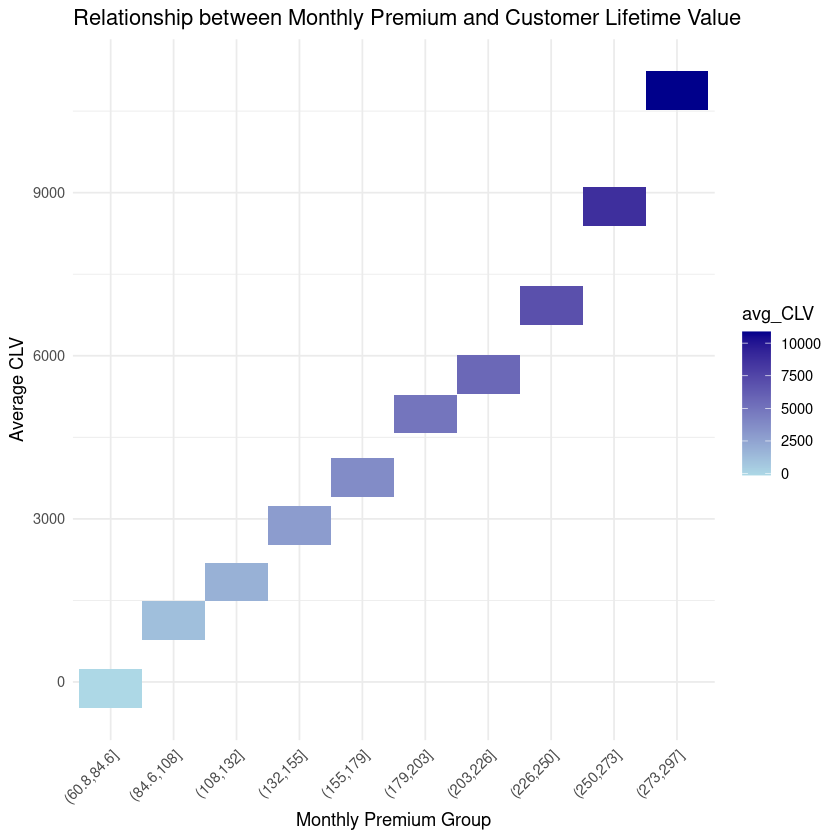

In [14]:

claims_df$monthly_premium_group <- cut(claims_df$monthly_premium, breaks = 10)

#  average CLV for each monthly premium group
avg_CLV_by_monthly_premium <- claims_df %>%
  group_by(monthly_premium_group) %>%
  summarise(avg_CLV = mean(customer_lifetime_value, na.rm = TRUE))

avg_CLV_by_monthly_premium
#  correlation coefficient 
correlation <- cor(claims_df$monthly_premium, claims_df$customer_lifetime_value, use = "complete.obs")

cat("Correlation between monthly premium and CLV:", round(correlation, 2), "\n")

# Heatmap 
ggplot(avg_CLV_by_monthly_premium, aes(x = monthly_premium_group, y = avg_CLV)) +
  geom_tile(aes(fill = avg_CLV)) +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Relationship between Monthly Premium and Customer Lifetime Value",
       x = "Monthly Premium Group", y = "Average CLV") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## Question 6


**Question**: Are some car sizes or classes associated with greater CLVs?




**Answer**: In fact, the data shows that higher customer lifetime value (CLV) is correlated with vehicle classes/sizes this association is most noticeable in the premium automobile and luxury SUV categories. When measured against other segments, these have noticeably greater CLV. Customers who drive luxury cars may have greater socioeconomic standing, which affects their ability to make purchases and how much they pay on insurance. Furthermore, longer-term customer connections may be fostered by the comfort, amenities, and perceived value associated with luxury automobiles, leading to increased CLV. Thus, the insurance firm may see a large increase in client retention and profitability if it customized its marketing plans and insurance products to appeal to owners of luxury cars.








## Supporting Analysis


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


vehicle_class,vehicle_size,avg_CLV
<fct>,<fct>,<dbl>
Two-Door Car,Small,329.7684
Two-Door Car,Midsize,242.6279
Two-Door Car,Large,312.3309
Four-Door Car,Small,227.7277
Four-Door Car,Midsize,276.9256
Four-Door Car,Large,323.9313
Sports Car,Small,2316.5962
Sports Car,Midsize,2158.8252
Sports Car,Large,1937.1351


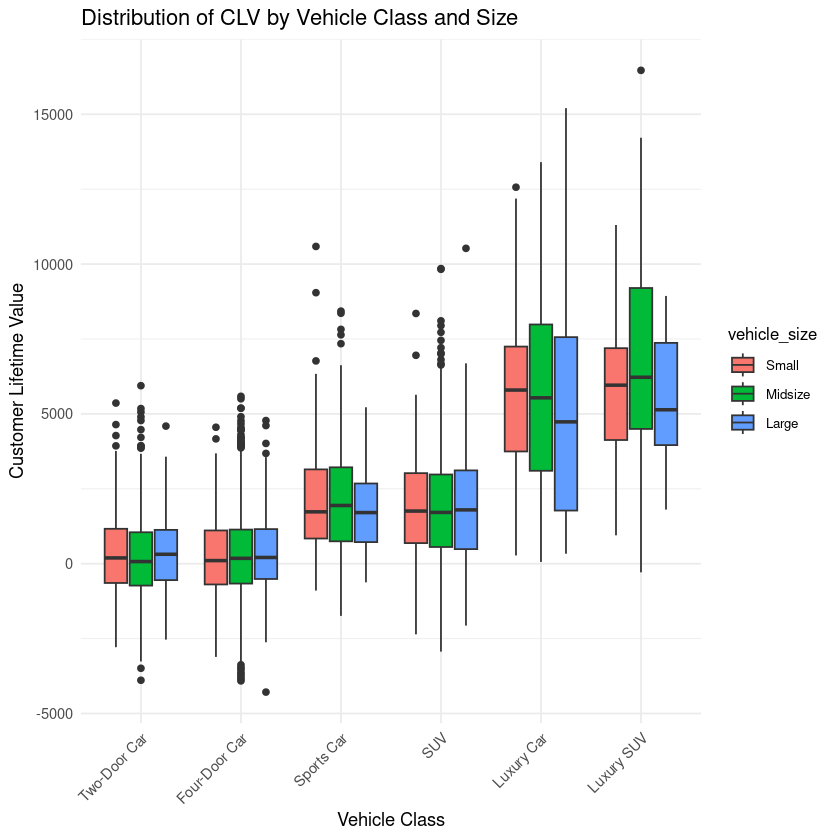

In [15]:

#  average CLV for each vehicle class and size
avg_CLV_by_vehicle <- claims_df %>%
  group_by(vehicle_class, vehicle_size) %>%
  summarise(avg_CLV = mean(customer_lifetime_value, na.rm = TRUE))

avg_CLV_by_vehicle


# Box plot
ggplot(claims_df, aes(x = vehicle_class, y = customer_lifetime_value, fill = vehicle_size)) +
  geom_boxplot() +
  labs(title = "Distribution of CLV by Vehicle Class and Size",
       x = "Vehicle Class", y = "Customer Lifetime Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 8))


## Question 7


**Question**: Does the duration elapsed since the previous claim affect the lifetime value of the customer?




**Answer**: In fact, the graphic indicates that customer lifetime value (CLV) is highly impacted by the amount of time since the previous claim. A clear pattern can be seen in the scatter plot with a smooth curve: consumers who have had their last claim for longer likely to have greater CLV. This suggests that clients who eventually file fewer claims may end up generating a greater CLV for the insurance provider. It may be essential to comprehend and control the variables that lead to longer time between claims, such as safe driving practices or routine auto maintenance, in order to maximize CLV and raise the insurance company's total profitability.







## Supporting Analysis


# A tibble: 6 × 2
  time_since_last_claim_bins avg_CLV
  <fct>                        <dbl>
1 (0,6]                        -198.
2 (6,12]                        411.
3 (12,18]                       803.
4 (18,24]                      1498.
5 (24,30]                      2053.
6 NA                           2084.


`geom_smooth()` using formula = 'y ~ x'


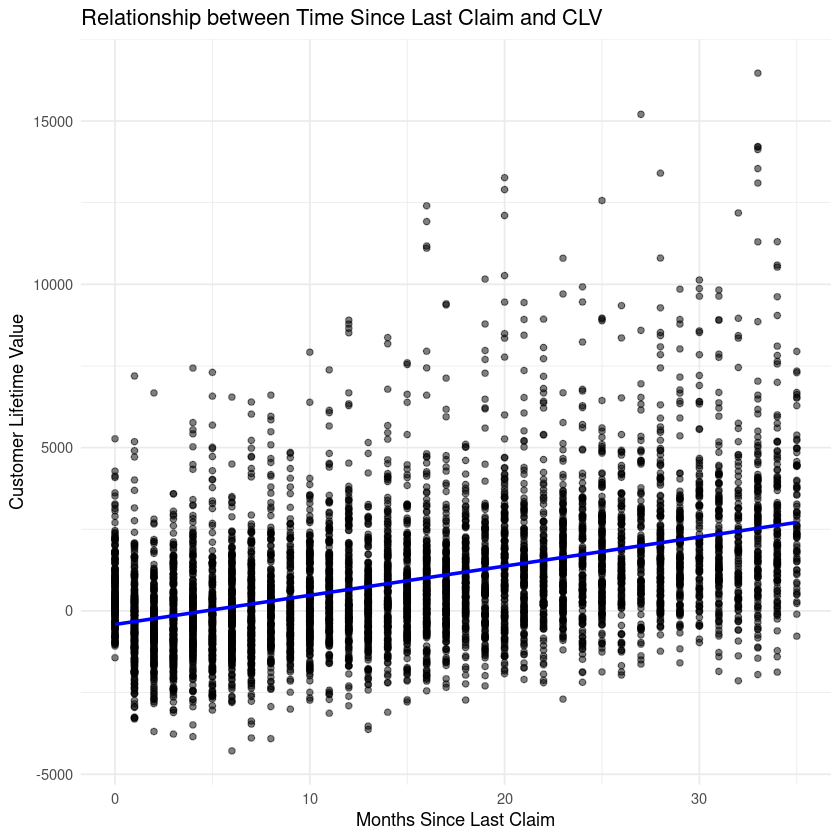

In [16]:
claims_df$time_since_last_claim_bins <- cut(claims_df$months_since_last_claim, breaks = seq(0, max(claims_df$months_since_last_claim), by = 6))

#  average CLV for each time interval since last claim
avg_CLV_by_time_since_last_claim <- claims_df %>%
  group_by(time_since_last_claim_bins) %>%
  summarise(avg_CLV = mean(customer_lifetime_value, na.rm = TRUE))

print(avg_CLV_by_time_since_last_claim)

# Scatter plot 
ggplot(claims_df, aes(x = months_since_last_claim, y = customer_lifetime_value)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Relationship between Time Since Last Claim and CLV",
       x = "Months Since Last Claim", y = "Customer Lifetime Value") +
  theme_minimal()



## Question 8


**Question**: Does the CLV change depending on the sales channel or the customer's status?



**Answer**: The box plot study suggests that there is not much difference in customer lifetime value (CLV) between various customer stages and sales channels. The box plots provide comparable CLV median values and interquartile ranges for each category, suggesting that there are no appreciable variations in CLV according to sales channel or customer status. This implies that a customer's CLV could not be much impacted by their location or the way they were acquired. 


## Supporting Analysis


# A tibble: 5 × 2
  customer_state avg_CLV
  <fct>            <dbl>
1 Washington        867.
2 Oregon            947.
3 California        883.
4 Nevada            971.
5 Arizona           956.


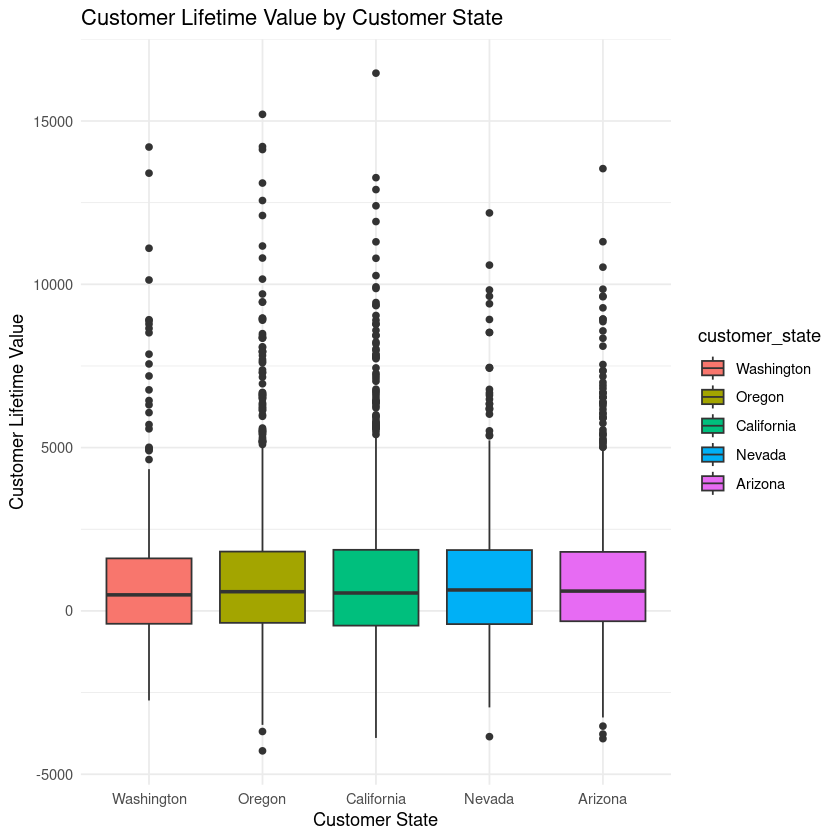

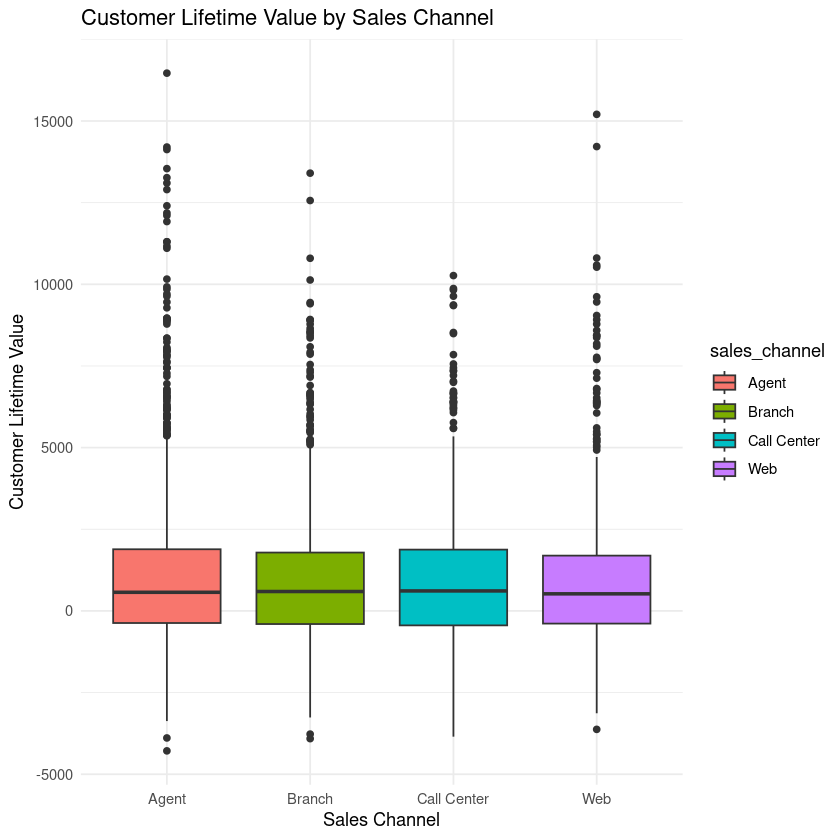

In [17]:

#  average CLV for each customer state
avg_CLV_by_state <- claims_df %>%
  group_by(customer_state) %>%
  summarise(avg_CLV = mean(customer_lifetime_value, na.rm = TRUE))

print(avg_CLV_by_state)



#  CLV based on customer state
ggplot(claims_df, aes(x = customer_state, y = customer_lifetime_value, fill = customer_state)) +
  geom_boxplot() +
  labs(title = "Customer Lifetime Value by Customer State",
       x = "Customer State", y = "Customer Lifetime Value") +
  theme_minimal()

#  CLV based on sales channel
ggplot(claims_df, aes(x = sales_channel, y = customer_lifetime_value, fill = sales_channel)) +
  geom_boxplot() +
  labs(title = "Customer Lifetime Value by Sales Channel",
       x = "Sales Channel", y = "Customer Lifetime Value") +
  theme_minimal()



# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

The car insurance business is having trouble staying profitable in the face of shifting consumer preferences and shifting market conditions. Our analysis used data insights to guide strategic decision-making in order to solve important company objectives and difficulties. In order to maximize profits and ensure long-term performance, the corporation works to improve client happiness, optimize pricing, and modify insurance policies.

## Key Findings

Customer segmentation: Certain policy types and customers with higher education levels—particularly those holding Master's degrees—make a substantial contribution to profitability.

Claim Patterns: Some policies, including "Special" and "Corporate," show fewer frequency of claims, which might result in higher earnings for the business.

Problematic consumers: A disproportionate amount of claims are made by a small percentage of consumers, indicating the existence of "problem customers" that call for specific management techniques.

Income and Customer Lifetime Value (CLV): Income levels and CLV do not significantly correlate, suggesting that other factors may have an impact on CLV.

Monthly Premium and CLV: The monthly premium and CLV show a significant positive association, which emphasizes the significance of premium optimization techniques.

Vehicle Classes and CLV: Owners of luxury vehicles, especially SUVs and sedans, have higher CLVs, which means there are chances for product offerings and focused marketing.

Time Since Last Claim: Clients with longer wait times between claims typically have higher CLVs, highlighting the need of encouraging safe driving practices and preventative actions.

Impact of Sales Channel and Geography: There is little difference in CLV between sales channels and client states, indicating that these variables may not have a major impact on CLV.


## Recommendations

Targeted Marketing: Concentrate marketing efforts on clientele groups who have more potential for income, such as owners of luxury cars and master's degree holders.

Policy Optimization: Examine policies with lower claim frequencies in more detail to find the elements that make them profitable, and think about making more offerings in these areas.

Customer management: Use focused tactics, such as risk assessment techniques and individualized support, to efficiently handle demanding clients.

Premium Adjustment: To maximize premium structures and improve revenue generation, take advantage of the high correlation that exists between monthly premium and CLV.

Product Development: Investigate chances to launch customized insurance plans for certain clientele groups by utilizing data from car classes and educational attainment levels.

Initiatives for Safe Driving: Encourage defensive driving techniques and proactive steps to prolong the time between accidents, which will eventually increase CLV and lower claim expenses.

Sales Channel Optimization: Even if there aren't many regional or sales channel differences in CLV, you should keep an eye on these variables and modify your sales tactics as needed to achieve long-term success.

## Conclusion

The business can increase client happiness, boost profitability, and keep a competitive advantage in the car insurance market by putting these data-driven insights into practice. Utilizing focused marketing techniques, policy optimization, and client segmentation will position the business for long-term success in the changing insurance market.